# Histogram filter

Assume we have a robot that can be in one of five blocks. With no other info we calculate the probability of the robot being in each such and plot a histogram of the probabilities:

In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, signal

In [ ]:
no_of_blocks = 5
prb = 1/5

p = [prb, prb, prb, prb, prb]

plt.bar(range(no_of_blocks), p)

Now we say that each block is either red or green and that our robot can sense that colour. We multiply all the correct sensings with 0.6 and the incorrect with 0.2. These values are arbitrary and just represent that the robot has a higher probability to be at a red block if that is what is measured.

In the following we define the world and make a function that calculates the new probabilities by using the measurement. We then try it out with a measurement of 'red'.

Notice that we divide each probability with the sum of all probabilities in order to get something that adds up to one.

In [ ]:
no_of_blocks = 5
prb = 1/5
p = [prb, prb, prb, prb, prb]

world = ['green', 'red', 'red', 'green', 'green']
z = 'red' # Measurement
pHit = 0.6
pMiss = 0.2

def sense(p,z):
    q = []
    for i in range(len(world)):
        hit = (z == world[i]) # True if measurement matches this part of the world, false if not.
        q.append(p[i]*(hit * pHit + (1- hit) * pMiss))
        
    q = np.array(q)/sum(q) # Divide the probability with the sum of all probabilities, to make it add up to 1.
    return q


q = sense(p,z)
print(q)

plt.bar(range(no_of_blocks), q)

Next we make a function that moves the robot. This is easily done using the numpy roll method:

In [ ]:
def move(p, U):
    q=np.roll(p,U)
    return q

q = move(q, 2)
plt.bar(range(no_of_blocks), q)

Every time we move there is some uncertainty to the movement, due to measurement uncertainties, etc. We therefore add some uncertainty to the movement. We do this by convolving the uncertainty with the probabilites. We use a scipy filter to do this:

In [ ]:
move_uncertainty=[0.1 , 0.8, 0.1]

def move(p, U, move_uncertainty):
    q=np.roll(p,U)
    q=ndimage.convolve1d(q,move_uncertainty,mode='wrap')
    return q

q = move(q, 2, move_uncertainty)
plt.bar(range(no_of_blocks), q)

Now let's see what happens if we move the robot a thousand times without sensing anything:

In [ ]:
for i in range(1000):
    q = move(q, 2, move_uncertainty)
    
plt.bar(range(no_of_blocks), q)

Let's try both sensing and moving. We write the full code:

C:\Users\oem\AppData\Local\Temp\ipykernel_31956\116240571.py:23: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  q=ndimage.filters.convolve1d(q,move_uncertainty,mode='wrap')


<BarContainer object of 5 artists>

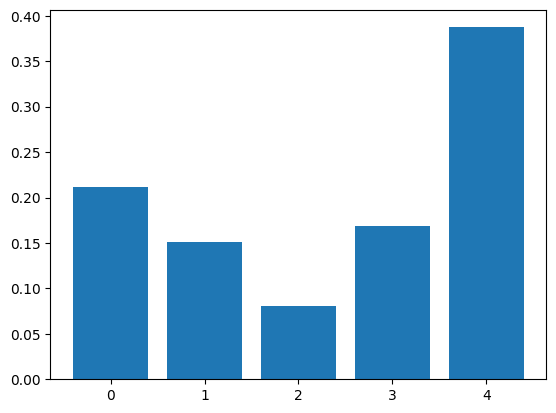

In [4]:
# We define the world, uncertainties, etc. as before.
no_of_blocks = 5
prb = 1/5
p = [prb, prb, prb, prb, prb]
world = ['green', 'red', 'red', 'green', 'green']
measurements=['red','green']
phit=0.6
pmiss=0.2
movements =[1, 1] 
move_uncertainty=[0.1 , 0.8, 0.1]

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i]*(hit * phit + (1- hit) * pmiss))

    q = np.array(q)/sum(q)
    return q

def move(p, U, move_uncertainty):
    q=np.roll(p,U)
    q=ndimage.filters.convolve1d(q,move_uncertainty,mode='wrap')
    return q

# We make a loop where we measure and move
for i in range(len(movements)):
    p=sense(p,measurements[i])
    p = move(p, movements[i], move_uncertainty)
    
plt.bar(range(no_of_blocks),p)

NameError: name 'np' is not defined

# Exercise 1
We will now extent the histogram plot to work in 2D. You are given the world map and the move function below. We can now move up, down, left and right in the world. We can plot the map with the probabilities by using plt.imshow.
Insert a sense function that will work in 2D, and loop through the measurements and movements, while showing the probabilities using plt.imshow. You will also need to insert a 2D version of the move_uncertainty.

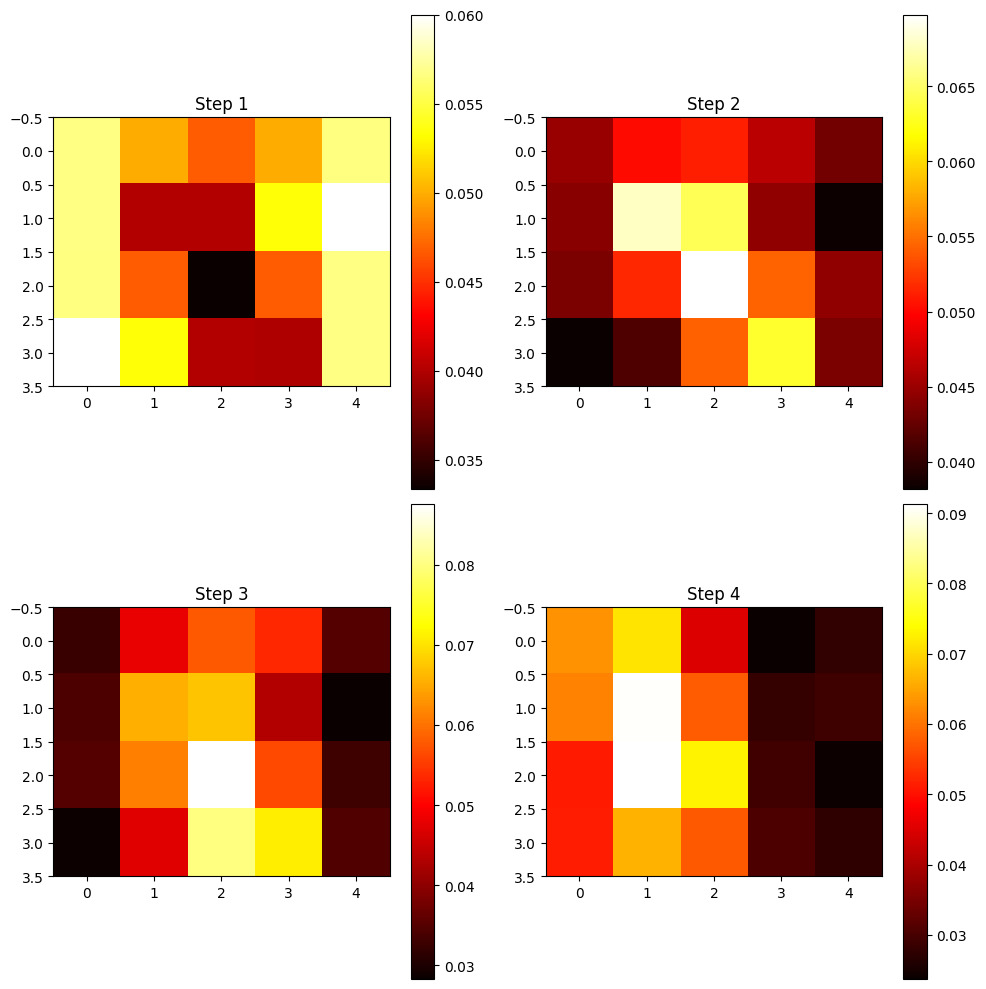

In [17]:
no_of_blocks = 20
prb = 1/20

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb]]

# The world map
world = [['red', 'green', 'green', 'red', 'red'],
         ['red', 'red', 'green', 'red', 'red'],
         ['red', 'red', 'green', 'green', 'red'],
         ['red', 'red', 'red', 'red', 'red']]

measurements=['red','green', 'green', 'green']
phit=0.6
pmiss=0.2
movements =['up', 'up', 'up', 'left']

# Define move_uncertainty
move_uncertainty = np.array([[0.1, 0.1, 0.1],
                             [0.1, 0.4, 0.1],
                             [0.1, 0.1, 0.1]])


# Normalize a 2D list
def normalize(matrix):
    total = sum(sum(row) for row in matrix)
    return [[val / total for val in row] for row in matrix]


# Sense function
def sense(p, z):
    q = []
    for i in range(len(p)):
        row = []
        for j in range(len(p[0])):
            hit = (z == world[i][j])
            row.append(p[i][j] * (hit * phit + (1 - hit) * pmiss))
        q.append(row)
    return normalize(q)


# Move function
def move(p, u, move_uncertainty):
    rows, cols = len(p), len(p[0])
    q = [[0] * cols for _ in range(rows)]
    
    # Rolling based on movement
    if u == 'up':
        rolled_p = p[-1:] + p[:-1]
    elif u == 'down':
        rolled_p = p[1:] + p[:1]
    elif u == 'left':
        rolled_p = [row[1:] + row[:1] for row in p]
    elif u == 'right':
        rolled_p = [row[-1:] + row[:-1] for row in p]
    else:
        rolled_p = p
    
    # Convolve with move uncertainty
    for i in range(rows):
        for j in range(cols):
            for di, drow in enumerate(move_uncertainty):
                for dj, val in enumerate(drow):
                    ni = (i + di - 1) % rows  # Wrap index for rows
                    nj = (j + dj - 1) % cols  # Wrap index for columns
                    q[i][j] += rolled_p[ni][nj] * val
    return normalize(q)


# Visualization
plt.figure(figsize=(10, 10))
for i in range(len(movements)):
    # Update probabilities based on measurement
    p = sense(p, measurements[i])
    
    # Update probabilities based on movement
    p = move(p, movements[i], move_uncertainty)
    
    # Plot the current probability distribution
    plt.subplot(2, 2, i + 1)
    plt.imshow(p, cmap='hot', interpolation='nearest')
    plt.title(f"Step {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()